In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Datos=np.genfromtxt("MultiLinReg.csv",delimiter=",")
Datos.shape

(200, 6)

# Hold-out

In [3]:
np.random.shuffle(Datos)

In [4]:
N=len(Datos)
N

200

In [5]:
n_train=int(0.75*N)
n_test=N-n_train
print(n_train,n_test)

150 50


In [6]:
X_train,X_test=Datos[:n_train,:-1],Datos[n_train:,:-1]
y_train,y_test=Datos[:n_train,-1],Datos[n_train:,-1]

In [7]:
k=5
n_val= int(n_train/k)
n_val

30

In [17]:
for j in range(k):
    indVal=np.arange(j*n_val,(j+1)*n_val)
    indTra= np.append(np.arange(0,j*n_val),np.arange((j+1)*n_val,n_train))
    x= X_train[indTra]

IndexError: index 120 is out of bounds for axis 0 with size 120

In [11]:
X_train=np.c_[np.ones((n_train,1)),X_train]

In [12]:
X_test=np.c_[np.ones((n_test,1)),X_test]

In [15]:
m=len(X_test[0])

In [20]:
y_train=y_train.reshape((-1,1))
y_test=y_test.reshape((-1,1))

In [28]:
alfa=0.1
beta1=0.9
beta2=0.999
eps=1e-8
n_iter=50
A=np.random.randn(m,1)
M=np.zeros_like(A)
S=np.zeros_like(A)
mse_train=[]
mse_test=[]
for i in range(n_iter):
    grad=2*(np.dot(np.dot(X_train.T,X_train),A)-np.dot(X_train.T,y_train))/N
    M=beta1*M+(1-beta1)*grad
    S=beta2*S+(1-beta2)*(grad*grad)
    M1=M/(1-beta1**(i+1))
    S1=S/(1-beta2**(i+1))
    A-=alfa*M1/(np.sqrt(S1)+eps)
    e_train=np.dot(X_train,A)-y_train
    e_test=np.dot(X_test,A)-y_test
    mse_train.append(np.sum(e_train**2)/n_train)
    mse_test.append(np.sum(e_test**2)/n_test)
    if i%100==0: print(i,mse_train[-1],mse_test[-1])
A

0 6897.43729121 7098.44814266


array([[ 4.19164588],
       [ 3.76730051],
       [ 2.36861249],
       [ 3.1860443 ],
       [ 2.88756314],
       [ 4.34353079]])

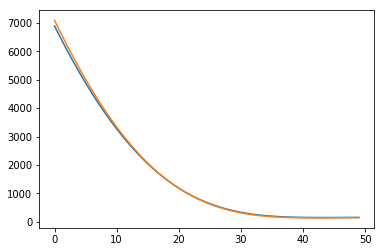

In [29]:
plt.plot(range(n_iter),mse_train)
plt.plot(range(n_iter),mse_test)
plt.show()